<a href="https://colab.research.google.com/github/varun6579/AIML-1278/blob/main/AIML_LAB_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline

**2-Loading the data**

In [ ]:
from sklearn.datasets import fetch_openml
car_data=fetch_openml(name='car',version=2,parser='auto')

In [ ]:
type(car_data)

sklearn.utils._bunch.Bunch

In [ ]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [ ]:
car_data.details['version']

'2'

In [ ]:
#Data description
car_data.keys()
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [ ]:
#displaying feature names
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [ ]:
# getting the whole data frame
car_data=car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [ ]:
type(car_data)

pandas.core.frame.DataFrame

**3-Exploratory Analysis**

Before doing exploratory analysis,lets get the training and test data

Text(0.5, 1.0, ' Decision of buyinf based on No of Persons')

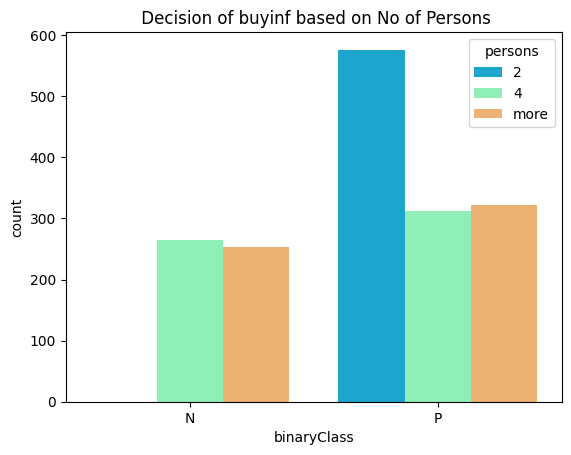

In [ ]:
sns.countplot(x=car_data.binaryClass, hue="persons", data=car_data,palette="rainbow")
plt.title(" Decision of buyinf based on No of Persons")
#sns.xlabel("Persons")
#sns.ylable("Count")
#sns.show()

Text(0.5, 1.0, ' Decision of buyinf based on No of Persons')

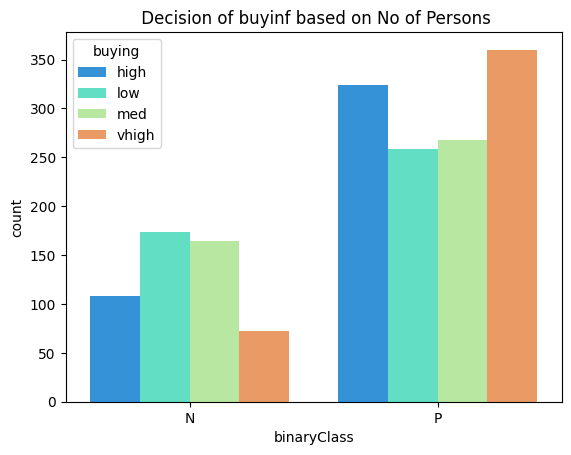

In [ ]:
sns.countplot(x=car_data.binaryClass, hue="buying", data=car_data,palette="rainbow")
plt.title(" Decision of buyinf based on No of Persons")
#sns.xlabel("Persons")
#sns.ylable("Count")
#sns.show()

Splitting the data into training and test sets

In [ ]:

from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(car_data,test_size=0.3,random_state=20)
print(f"The size of the taining data is:{train_data},testing data{test_data}")

The size of the taining data is:     buying  maint  doors persons lug_boot safety binaryClass
1005    med   high      3       2      big    low           P
551    high   high      2       4    small   high           N
1334    low  vhigh      3       4    small   high           N
409   vhigh    low  5more       2      med    med           P
1682    low    low      4       2      big   high           P
...     ...    ...    ...     ...      ...    ...         ...
924     med  vhigh      4       2      big    low           P
1247    med    low      4       2      med   high           P
271   vhigh    med      4       2    small    med           P
474    high  vhigh      3       4      big    low           P
1379    low  vhigh  5more       2    small   high           P

[1209 rows x 7 columns],testing data     buying maint  doors persons lug_boot safety binaryClass
280   vhigh   med      4       4    small    med           P
307   vhigh   med  5more       4    small    med           P
1421

In [ ]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1209,1209,1209,1209,1209,1209,1209
unique,4,4,4,3,3,3,2
top,med,high,5more,more,big,med,P
freq,327,311,319,418,411,406,849


In [ ]:
#Checking missing values
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


In [ ]:
train_data['buying'].value_counts()

,count
buying,
med,327
high,307
vhigh,291
low,284


In [ ]:
train_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

<Axes: xlabel='binaryClass', ylabel='count'>

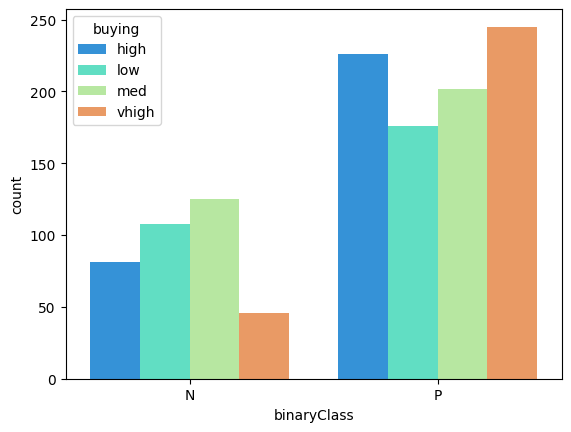

In [ ]:
#plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='binaryClass',hue='buying',palette="rainbow")

In [ ]:
car_train=train_data.drop('binaryClass',axis=1)
car_labels=train_data[['binaryClass']]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe = Pipeline([('ord_enc',OrdinalEncoder())])
car_train_prepared=pipe.fit_transform(car_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc =LabelEncoder()
car_labels_prepared = label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier()
tree_clf.fit(car_train_prepared , car_labels_prepared)

DecisionTreeClassifier()

In [ ]:
text_representation=tree.export_text(tree_clf)
print(text_representation)

NameError: name 'tree' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
def accuracy(input_data,model,labels):
  preds=model.predict(input_data)
  acc=accuracy_score(labels,preds)
  return acc

In [ ]:
from sklearn.metrics import pair_confusion_matrix
def conf_matrix(input_data,model,labels):
  preds=model.predict(input_data)
  cm=conf_matrix(labels,preds)
  return cm